# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

In [1]:
!wget --header="Host: doc-0c-2g-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,kn-IN;q=0.8,kn;q=0.7" --header="Referer: https://drive.google.com/drive/folders/13dXJZqM3nIG8ynV9hs8o49ecXZ0La6jE" --header="Cookie: AUTH_ehm6nt1btirko8i3re3h98kdfq64bivv_nonce=pl4jkcbqn3mv4" --header="Connection: keep-alive" "https://doc-0c-2g-docs.googleusercontent.com/docs/securesc/7v9u186075bhbu1r4phlj8d2d6omqpo8/fmcorecsenm7kb8vhnt80031vpo7rc8b/1598436975000/00484516897554883881/07654260302095542947/1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM?e=download&authuser=0&nonce=pl4jkcbqn3mv4&user=07654260302095542947&hash=sngo5fvdr56lc2i8peu5s2h0i6enn3sl" -c -O 'documents.rar'

--2020-08-26 10:17:04--  https://doc-0c-2g-docs.googleusercontent.com/docs/securesc/7v9u186075bhbu1r4phlj8d2d6omqpo8/fmcorecsenm7kb8vhnt80031vpo7rc8b/1598436975000/00484516897554883881/07654260302095542947/1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM?e=download&authuser=0&nonce=pl4jkcbqn3mv4&user=07654260302095542947&hash=sngo5fvdr56lc2i8peu5s2h0i6enn3sl
Resolving doc-0c-2g-docs.googleusercontent.com (doc-0c-2g-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Connecting to doc-0c-2g-docs.googleusercontent.com (doc-0c-2g-docs.googleusercontent.com)|172.217.212.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/rar]
Saving to: ‘documents.rar’

documents.rar           [  <=>               ]  18.16M  80.2MB/s    in 0.2s    

2020-08-26 10:17:05 (80.2 MB/s) - ‘documents.rar’ saved [19038123]



In [2]:
import os

# define the name of the directory to be created
path = "/content/documents/"

try:
    os.makedirs(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory /content/documents/ 


In [3]:
!pip install patool
import patoolib
patoolib.extract_archive("documents.rar", outdir="/content/documents/")

     |████████████████████████████████| 81kB 2.4MB/s 
patool: Extracting documents.rar ...
patool: running /usr/bin/unrar x -- /content/documents.rar
patool:     with cwd='/content/documents/'
patool: ... documents.rar extracted to `/content/documents/'.


'/content/documents/'

In [ ]:
!unrar x documents.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open documents.rar
No such file or directory
No files to extract


In [4]:
!ls

documents  documents.rar  sample_data


In [5]:
import re
import nltk
from chardet import detect
import numpy as np
import pandas as pd
import os

nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

<IPython.core.display.Javascript object>


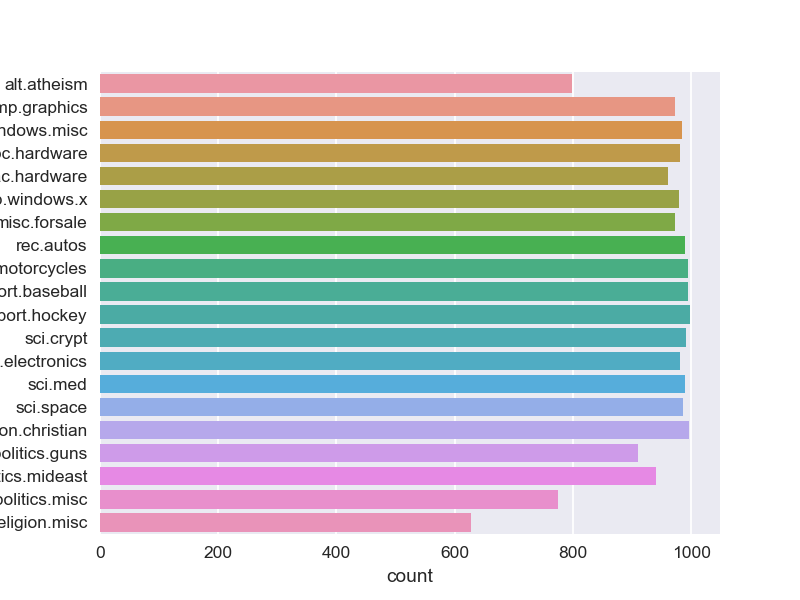

In [ ]:
### count plot of all the class labels. 

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [ ]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email

array(['juliet caltech edu',
       'coding bchs edu newsgate sps mot austlcm sps mot austlcm sps mot com  dna bchs edu',
       'batman bmd trw', ..., 'rbdc wsnc org dscomsa desy zeus  desy',
       'rbdc wsnc org morrow stanford edu pangea Stanford EDU',
       'rbdc wsnc org apollo apollo'], dtype=object)

In [ ]:
len(preprocessed_email)

18828

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [ ]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

i am living in the New York --> [('i', 'NN'), ('am', 'VBP'), ('living', 'VBG'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP')])]
 
--------------------------------------------------
 
My name is Srikanth Varma --> [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), Tree('PERSON', [('Srikanth', 'NNP'), ('Varma', 'NNP')])]


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [ ]:
data.columns

Index(['text', 'class', 'preprocessed_text', 'preprocessed_subject',
       'preprocessed_emails'],
      dtype='object')


In [ ]:
data.iloc[400]

text                    From: arc1@ukc.ac.uk (Tony Curtis)\r\r\r\nSubj...
class                                                         alt.atheism
preprocessed_text       said re is article if followed the quoting rig...
preprocessed_subject                                christian morality is
preprocessed_emails                                   ukc mac macalstr edu
Name: 567, dtype: object


### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [10]:
"""Do all the Preprocessing as shown above and return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""

def preprocess(Input_Text):
  text_list=[]

  def encoding(file):
    with open(file,'rb') as fi:
      data = fi.read()
      #Python - chardet, which helps to detect the encoding used in your file. 
      #Actually there is no program that can say with 100% confidence which encoding was used that's why chardet gives the encoding with the highest probability the file was encoded with.
    return detect(data)['encoding']

#https://stackoverflow.com/questions/24398536/named-entity-recognition-with-regular-expression-nltk
  def chunking(input):
    parsing_tree = nltk.ne_chunk(nltk.tag.pos_tag(input.split()))  # POS tagging before chunking!
    named_entities = []
    actual_place_words=[]
    final_place_words=[]
    person=[]
    for parse in parsing_tree.subtrees():
      if parse.label() == 'PERSON':
        for index,ele in enumerate(parse):
          person.append(ele[0])

      if parse.label() == 'GPE':
        #print(list(t))
        word=[]
        for index,ele in enumerate(parse):
          word.append(ele[0])
        final_word = '_'.join(word)
        actual_word=' '.join(word)
        actual_place_words.append(actual_word)
        final_place_words.append(final_word)
        #print(final_word)
        #print(actual_word)
    sentence_list=input.split(" ")
    for i,e in enumerate(sentence_list):
       if e in person:
        sentence_list[i]=""
    sentence_list=' '.join(sentence_list)
  #print(actual_place_words
    for i,e in enumerate(actual_place_words):
      sentence_list=sentence_list.split(e)
      sentence_list=final_place_words[i].join(sentence_list)
    return  sentence_list 

  
  def decontracted(text):

    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\'t","will not", text)

    text = re.sub(r"\'ve", "have", text)
    text = re.sub(r"n\'t", "not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

  
  def underscore(input):

    len_check=0
    input_list=input.split(" ")
    for i,e in enumerate(input_list):
      if '_' in e:
        sublist=e.split("_")
        if ( all(len(i) >= 2 for i in sublist)):
          len_check=1
          for j,k in enumerate(sublist):
            if (len(k)<3):
              len_check=0
              sublist[j]=""
          if (len_check==1):
            sublist='_'.join(sublist)
          else:
            sublist=''.join(sublist)
          input_list[i]=sublist
      
    input_list=' '.join(input_list)  
    return input_list



  encoding_type = encoding(Input_Text) 
  ip_file = open(Input_Text,mode='r',encoding=encoding_type,errors='ignore')
  line_remove=False
  whole_text=ip_file.read()  
  text =[]
  
  # Task 1 and Task 2
  x = re.findall(r'@(\w+[\w.]+[a-z]*)', whole_text)
  mail_list=[]
  for i in x:
    ele_list=i.split('.') 
    mail_list+=ele_list
  for j in mail_list :
      if len(j)<3:
          mail_list.remove(j)
  mail_str = ' '.join(mail_list)
  mail_str = re.sub(r"com","",mail_str)
  emails=mail_str
  #https://stackoverflow.com/questions/44027943/python-regex-to-remove-emails-from-string
  items = whole_text.split()
  [i for i in items if '@' not in i]
  ' '.join([i for i in whole_text.split() if '@' not in i])
  text = whole_text

  # Task 3 and Task 4
  
  for line in whole_text.splitlines():
    line_remove=False
    if ("Subject:" in line):
      line_remove=True
      subject_line = line
      
    
    if ('From:' in line) or ('Write to:' in line):
      line_remove=True
    
    if (">" in line) and (len(line)==1):
      line_remove=True
    
    if (line.strip()=='') or (line == '\n'):
      line_remove=True
    
    if (line_remove == False):
      
      line = re.sub('[\<\(\[].*?[\)\]\>]',"",line) # Task 6 and 7
      line = re.sub('\W+',' ', line )    #Task 8
      line=re.sub(r'\w+:\s?','',line)     #Task 9
      line = decontracted(line) #Task 10
      line = chunking(line)  # Task 11 and Task 12
      line = re.sub('\d','',line) #Task 13
      line = re.sub('_','',line) # Task 14
      line = underscore(line) # Task 15 and Task 14
      line = line.lower() # Task16
      line=re.sub(r'\b\w{1,2}\b', '', line)
      line=re.sub(r'\b\w{15,50}\b', '', line)
      if(len(line)>2):
          text_list.append(line)
        
    
    
    text=' '.join(text_list)
    text=re.sub(' +', ' ', text)  # removing extra spaces




    
  subject_ele=subject_line.split(':')
  subject_ele=subject_ele[(len(subject_ele)-1)]
  subject_ele = re.sub('\W+',' ', subject_ele )

    #print(subject_ele)
  subject=subject_ele
  

  #print(type(line_remove))
  
  
  return emails,text,subject

In [7]:
#alt.atheism_49960
e,t,s=preprocess("/content/documents/documents/alt.atheism_49960.txt")
print("email:",e)
print("subject:",s)
print("text:",t)
print(len(t))

<class 'bool'>
email: mantis uk net  mantis uk
subject:  Atheist Resources
text: archive name atheism resources alt atheism archive name resources last modified december version atheist resources addresses atheist organizations usa freedom from religion foundation darwin fish bumper stickers and assorted other atheist paraphernalia are available from the freedom from religion foundation the telephone evolution designs designs sell the darwin fish fish symbol like the ones christians stick their cars but with feet and the word written inside the deluxe moulded plastic fish postpaid the people the san francisco bay area can get from try mailing for net people who directly the price per fish american atheist press aap publish various atheist books critiques the bible lists biblical contradictions and one such book the bible handbook and foote american atheist press isbn edition bible contradictions absurdities atrocities immoralities contains the bible contradicts based the king version t

In [11]:
import os

def preprocess1():
  list_of_preprocessed_emails=[]
  list_of_preprocessed_subject=[]
  list_of_preprocessed_text=[]
  list_of_class=[]
  base_dir="/content/documents/documents/"
  files = os.listdir(base_dir)
  for file in files:
    #print(file)
    if(file.endswith("txt")):
      #print(file)
      file_list=file.split("_")
      class_of_file=file_list[0]
      #print(class_of_file)
      list_of_class.append(class_of_file)
      file_path=base_dir+file
      
      mail,sub,text=preprocess(file_path)
      list_of_preprocessed_emails.append(mail)
      list_of_preprocessed_subject.append(sub)
      list_of_preprocessed_text.append(text)
  print(len(list_of_class))
  print(len(list_of_preprocessed_emails))
  print(len(list_of_preprocessed_subject))
  print(len(list_of_preprocessed_text))
  mail_df = pd.DataFrame(list_of_preprocessed_emails)
  subject_df = pd.DataFrame(list_of_preprocessed_subject) 
  class_df = pd.DataFrame(list_of_class) 
  text_df = pd.DataFrame(list_of_preprocessed_text) 
  df=pd.DataFrame(np.column_stack([mail_df, subject_df, text_df,class_df]), columns=['mail','subject','text','class'])
  return df


data_df=preprocess1()



18828
18828
18828
18828


In [ ]:
data_df.iloc[300]

mail       uokmax ecn uoknor edu uokmax ecn uoknor edu aa...
subject    hmmm was listening the local radio expert who ...
text                                      Slick 50 any good 
class                                              rec.autos
Name: 300, dtype: object

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

In [12]:
data_df['X'] = data_df['mail'] +" "+data_df['subject'] +" "+data_df['text']
max_length=0
for i in data_df["X"]:
  if (len(i)> max_length):
    max_length=len(i)
print("max_length:",max_length) 

print(data_df["X"].head())
print(data_df["class"].head())
print(data_df["X"].shape)
print(data_df["class"].shape)

max_length: 56307
0    cheshire oxy edu cheshire oxy edu the subject ...
1    iscsvax uni edu what the best way archive gif ...
2    cis uab edu cis uab edu  anyone familiar with ...
3    Campaign92 Org  white house office the vice pr...
4    p17 f40 n105 fidonet org  theory creationism t...
Name: X, dtype: object
0      comp.sys.mac.hardware
1              comp.graphics
2    comp.os.ms-windows.misc
3         talk.politics.misc
4                alt.atheism
Name: class, dtype: object
(18828,)
(18828,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_df["X"], data_df["class"],stratify=data_df["class"],test_size=0.25)

In [14]:
print(X_train.shape)
print(y_train.shape)

(14121,)
(14121,)


### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

In [17]:

import tensorflow as tf
import keras

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [18]:
#Tokenizing using Keras API:
t  = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n') # except underscore'_'
t.fit_on_texts(X_train)
X_train = t.texts_to_sequences(X_train)
X_test = t.texts_to_sequences(X_test)


print(len(X_train))
print(len(X_test))

14121
4707


In [ ]:
len(t.word_index)  #total no of words

89671

In [15]:
#labeling classes from string to interger and then encoding them:

from sklearn.preprocessing import LabelEncoder

def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train = le.transform(y_train)
	y_test = le.transform(y_test)
	return y_train, y_test

y_train, y_test=prepare_targets(y_train, y_test)
print(np.unique(y_train))
print(y_train[0:10])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 7  4  5  5 16  2 11 15 10 11]


In [19]:
y_train = keras.utils.to_categorical(y_train, num_classes=20)
y_test = keras.utils.to_categorical(y_test, num_classes=20)


In [20]:
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')

X_test = pad_sequences(X_test, maxlen=max_length, padding='post')


In [21]:
X_train[0]

array([ 9195, 12153, 23866, ...,     0,     0,     0], dtype=int32)

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Input
from keras.layers import Flatten,BatchNormalization
from keras.layers import Embedding
from keras.layers import Concatenate
from keras.models import Model
from keras.optimizers import Adam
from keras import regularizers


from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [23]:
def load_embedding(filename,encoding): 
    file = open(filename,'r',encoding=encoding)
    lines = file.readlines()[1:]
    file.close()
    embedding = dict()
    for line in lines:
        parts = line.split()
        embedding[parts[0]] = asarray(parts[1:], dtype='float32')
    return embedding

In [24]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

In [25]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,kn-IN;q=0.8,kn;q=0.7" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/715814%2F1246668%2Fcompressed%2Fglove.6B.100d.txt.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1598698531&Signature=O9t3zUmCpaWFsuDQDeASvqtJ65TtgMn9tvERm8daDpMDBrEgDa9KChi8jlicLviXePDtlV9HLgek%2F2fRaVAylIGya5oN%2F1c41quABW5TuvhpoXCh4wJv8%2FwD%2FzMAQU00RTxOmKUL14jDa26P2Z5N2sKHdRuYOhTwAs8%2FWvKedSCkZFz9eSmpd3T346z3dr7Iu2eJXdk%2B9kC3jx8zkw%2B7eMELUP8UrKRIvQo1dLV9mvFX3%2FCIGuea4TXcP7Xs%2FnWZowCKu4dqiHA3MfzaYIhlEkm4d3Ke0VxamkBslHNhKRzjHISb9PvAPfcp5SU7zIMR%2FSZZDu3FT2f%2FGzR9WUMYzw%3D%3D" -c -O '715814_1246668_compressed_glove.6B.100d.txt.zip'

--2020-08-26 10:55:58--  https://storage.googleapis.com/kaggle-data-sets/715814%2F1246668%2Fcompressed%2Fglove.6B.100d.txt.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1598698531&Signature=O9t3zUmCpaWFsuDQDeASvqtJ65TtgMn9tvERm8daDpMDBrEgDa9KChi8jlicLviXePDtlV9HLgek%2F2fRaVAylIGya5oN%2F1c41quABW5TuvhpoXCh4wJv8%2FwD%2FzMAQU00RTxOmKUL14jDa26P2Z5N2sKHdRuYOhTwAs8%2FWvKedSCkZFz9eSmpd3T346z3dr7Iu2eJXdk%2B9kC3jx8zkw%2B7eMELUP8UrKRIvQo1dLV9mvFX3%2FCIGuea4TXcP7Xs%2FnWZowCKu4dqiHA3MfzaYIhlEkm4d3Ke0VxamkBslHNhKRzjHISb9PvAPfcp5SU7zIMR%2FSZZDu3FT2f%2FGzR9WUMYzw%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137847651 (131M) [application/zip]
Saving to: ‘715814_1246668_compressed_glove.6B.100d.txt.zip’

715814_1246668_comp 100%[===============

In [27]:
!unzip 715814_1246668_compressed_glove.6B.100d.txt.zip -d glove.6B.100d

Archive:  715814_1246668_compressed_glove.6B.100d.txt.zip
  inflating: glove.6B.100d/glove.6B.100d.txt  


In [28]:
embeddings_index = {}
f = open(os.path.join('/content/glove.6B.100d/glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [29]:
keras.backend.clear_session()

In [31]:
word_index=t.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


In [32]:

from keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

In [ ]:
#Model1

sequence_input = Input(shape=(max_length,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
convolution1d_1_1=Conv1D(64,5, activation='relu')(embedded_sequences)
convolution1d_1_2=Conv1D(96,5, activation='relu')(embedded_sequences)
convolution1d_1_3=Conv1D(128,5, activation='relu')(embedded_sequences)
concatenate_1=Concatenate()([convolution1d_1_1, convolution1d_1_2,convolution1d_1_3])
maxpool_1=MaxPooling1D(5)(concatenate_1)
convolution1d_2_1=Conv1D(64,5, activation='relu')(maxpool_1)
convolution1d_2_2=Conv1D(32,5, activation='relu')(maxpool_1)
convolution1d_2_3=Conv1D(96,5, activation='relu')(maxpool_1)
concatenate_2=Concatenate()([convolution1d_2_1, convolution1d_2_2,convolution1d_2_3])
maxpool_2=MaxPooling1D(35)(concatenate_2)
convolution1d_3_1=Conv1D(64,5, activation='relu')(maxpool_2)
flat=Flatten()(convolution1d_3_1)
dense_layer1=Dense(32,activation='relu')(flat)
norm4=BatchNormalization()(dense_layer1)
drop_layer4=Dropout(0.5)(norm4)
output=Dense(20,activation="softmax",kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(drop_layer4)
model1 = Model(inputs=sequence_input,outputs=output)


model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])
model1.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 56307)]      0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 56307, 100)   8967200     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 56303, 64)    32064       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 56303, 96)    48096       embedding[0][0]                  
_______________________________________________________________________________________

In [ ]:
  %reload_ext tensorboard

In [33]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from keras.callbacks import Callback
from keras.callbacks import TensorBoard
from sklearn.metrics import f1_score 

import datetime




class Custom_callback(keras.callbacks.Callback):
    def __init__(self, validation_data=()):
        super(keras.callbacks.Callback, self).__init__()

        self.X_val, self.y_val = validation_data

    def on_train_begin(self, logs={}):
        self.f1Score_List = []
    def on_epoch_end(self, validation_data=(), logs={}):
        #print(self.validation_data)
        y_targ = self.y_val
        y_predict = (np.asarray(self.model.predict(self.X_val))).round()
        f1Score = f1_score(y_targ, y_predict,average='micro')
        self.f1Score_List.append(f1Score)
        print (" — F1_Score: {0} ".format(f1Score))
        val_acc = logs.get('val_acc')
        if ((val_acc*100) > 71.3) :
          print("\nReached {0} accuracy, so stopping training!!".format((val_acc*100)))  
          self.model.stop_training = True


tensorboard_callback = TensorBoard(log_dir='model1',histogram_freq=1, write_graph=True,write_grads=True)

early_stop = EarlyStopping(monitor = "val_acc", patience = 10) #early stop

filepath = "best_model_1.h5"
model_chkpt = ModelCheckpoint(filepath, monitor = "acc", save_best_only=True, verbose = 1)

F1 = Custom_callback(validation_data=(X_test, y_test))


callback=[F1,tensorboard_callback,early_stop,model_chkpt]

        

In [ ]:
import keras
keras.backend.clear_session()


In [ ]:

model1.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=32,
          callbacks=callback)

Epoch 1/20
  1/442 [..............................] - ETA: 0s - loss: 3.0592 - acc: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
442/442 [==============================] - ETA: 0s - loss: 2.6336 - acc: 0.1658 — F1_Score: 0.053608247422680416 

Epoch 00001: acc improved from -inf to 0.16578, saving model to best_model_1.h5
442/442 [==============================] - 538s 1s/step - loss: 2.6336 - acc: 0.1658 - val_loss: 2.1087 - val_acc: 0.2921
Epoch 2/20
442/442 [==============================] - ETA: 0s - loss: 1.8538 - acc: 0.3883 — F1_Score: 0.4376284584980236 

Epoch 00002: acc improved from 0.16578 to 0.38829, saving model to best_model_1.h5
442/442 [==============================] - 537s 1s/step - loss: 1.8538 - acc: 0.3883 - val_loss: 1.4084 - va

In [ ]:
score = model1.evaluate(X_train, y_train,verbose=1)
print('accuracy:', score[1])


In [ ]:
%tensorboard --logdir 'model1'

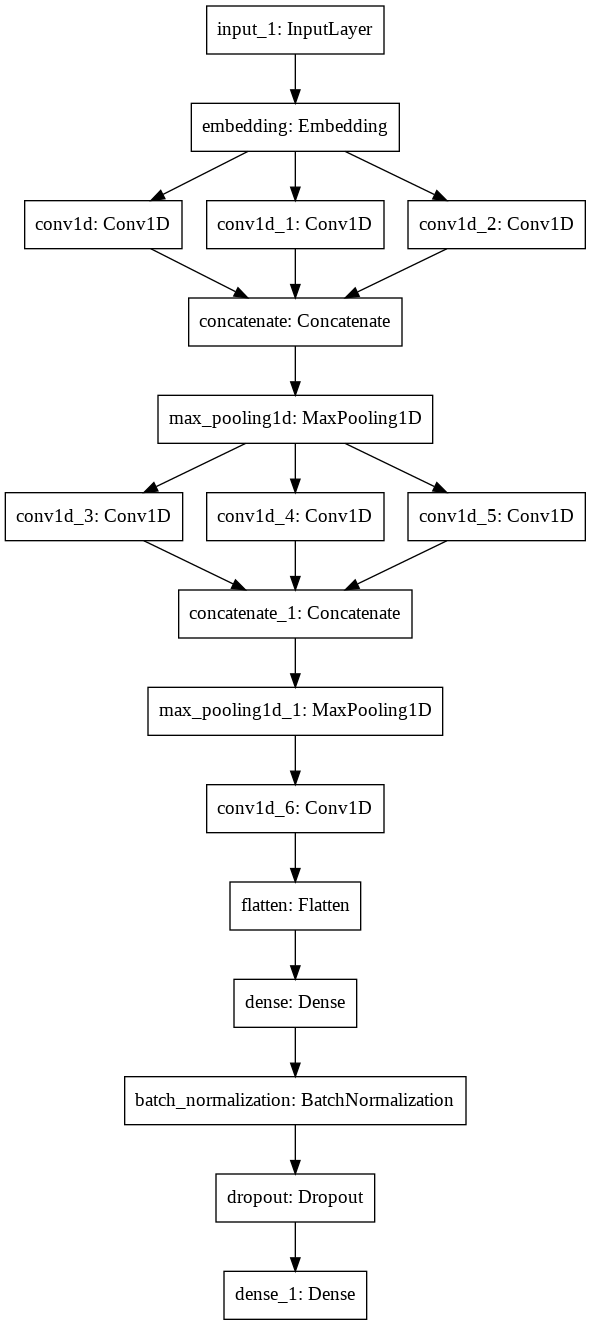

In [ ]:
import keras
keras.utils.plot_model(model1, to_file='model1.png')

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>

In [ ]:
keras.backend.clear_session()



In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,kn-IN;q=0.8,kn;q=0.7" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/5504%2F8240%2Fcompressed%2Fglove.6B.300d.txt.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1598532774&Signature=Qz5I7n0eEajSIFyMjC4c9IAsAcBYMw5qmzYogrSZQoiYnRp9KBt6OZcH3%2Fz8BCWH9e4sn1G2VVqlQDHGW7VDR6MCl8cOCFGK2aV8yEGLNl7JPr1ZxZLn88PxY0oVrDLnxkNvMn25CcwPHV3FmqkRtp3a8WKo6c9p3017eMRupT2a4h97aTNq45%2FQL5EKH8hrM%2BEnsjiBaSBuRZWr%2FKWInOYMH2sKLSIfW2ViaM%2FPFnDb6otx0fetgdOYg9aRX%2Bq%2BJJEjaXAquEGuQeG5Yg2sgGTRgJG3AKUjZ%2FYB3%2FKcnLOUh3R7LnVphdxRPN7QeStHAs9OMxq8OJTJtU1efkAmvQ%3D%3D" -c -O '5504_8240_compressed_glove.6B.300d.txt.zip'

--2020-08-24 12:53:20--  https://storage.googleapis.com/kaggle-data-sets/5504%2F8240%2Fcompressed%2Fglove.6B.300d.txt.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1598532774&Signature=Qz5I7n0eEajSIFyMjC4c9IAsAcBYMw5qmzYogrSZQoiYnRp9KBt6OZcH3%2Fz8BCWH9e4sn1G2VVqlQDHGW7VDR6MCl8cOCFGK2aV8yEGLNl7JPr1ZxZLn88PxY0oVrDLnxkNvMn25CcwPHV3FmqkRtp3a8WKo6c9p3017eMRupT2a4h97aTNq45%2FQL5EKH8hrM%2BEnsjiBaSBuRZWr%2FKWInOYMH2sKLSIfW2ViaM%2FPFnDb6otx0fetgdOYg9aRX%2Bq%2BJJEjaXAquEGuQeG5Yg2sgGTRgJG3AKUjZ%2FYB3%2FKcnLOUh3R7LnVphdxRPN7QeStHAs9OMxq8OJTJtU1efkAmvQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404848122 (386M) [application/zip]
Saving to: ‘5504_8240_compressed_glove.6B.300d.txt.zip’

5504_8240_compresse 100%[===================>] 386.09M  70.

In [34]:

import tensorflow as tf
import keras

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [ ]:
!rm -rf glove.6B.300d.txt

In [51]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,kn-IN;q=0.8,kn;q=0.7" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/715814%2F1246668%2Fcompressed%2Fglove.6B.100d.txt.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1598699168&Signature=Hy16iGrsoMJn3ZDgpXZ9qNQgfAUb9gklcGSvUiLu9qSggJ0U09SFwqJGrjzky9YrIUomUQBIii8EZAwn%2FjOZKIn7AAql88wW2cxdKRck3A73w46mZpOJsNaZijZdexVNU5rC48rYRs3i3%2BohyKGanOlMbJS%2FTOE8spDDdWaKCznOlpbE9SIEgcOX5GR4gIhsYtaV9cJ9slVFSuoQt9b2uvJjJqu8j0a6PaJugJ4OiDAq%2FpWhJgA%2FMisyhjyCYi8%2F3vslpfNi39vS8OjQjor86CoogPzyLduPA5Ihdfndzbq8zxi1a8BXde90%2B7CTtrtHiXVgfMtBKsJQndO9OpWJyw%3D%3D" -c -O '715814_1246668_compressed_glove.6B.100d.txt.zip'

--2020-08-26 11:06:29--  https://storage.googleapis.com/kaggle-data-sets/715814%2F1246668%2Fcompressed%2Fglove.6B.100d.txt.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1598699168&Signature=Hy16iGrsoMJn3ZDgpXZ9qNQgfAUb9gklcGSvUiLu9qSggJ0U09SFwqJGrjzky9YrIUomUQBIii8EZAwn%2FjOZKIn7AAql88wW2cxdKRck3A73w46mZpOJsNaZijZdexVNU5rC48rYRs3i3%2BohyKGanOlMbJS%2FTOE8spDDdWaKCznOlpbE9SIEgcOX5GR4gIhsYtaV9cJ9slVFSuoQt9b2uvJjJqu8j0a6PaJugJ4OiDAq%2FpWhJgA%2FMisyhjyCYi8%2F3vslpfNi39vS8OjQjor86CoogPzyLduPA5Ihdfndzbq8zxi1a8BXde90%2B7CTtrtHiXVgfMtBKsJQndO9OpWJyw%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



In [52]:
!unzip 715814_1246668_compressed_glove.6B.100d.txt.zip

Archive:  715814_1246668_compressed_glove.6B.100d.txt.zip
  inflating: glove.6B.100d.txt       


In [ ]:
!ls

5504_8240_compressed_glove.6B.300d.txt.zip  documents.rar      model1
715814_1246668_bundle_archive.zip	    glove.6B.100d      model1.png
best_model_1.h5				    glove.6B.300d      sample_data
documents				    glove.6B.300d.txt


In [66]:
import keras
keras.backend.clear_session()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_df["X"], data_df["class"],stratify=data_df["class"],test_size=0.25)

In [59]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Input
from keras.layers import Flatten,BatchNormalization
from keras.layers import Embedding
from keras.layers import Concatenate
from keras.models import Model
from keras.optimizers import Adam
from keras import regularizers


from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [68]:
t  = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',char_level = True) #will filter everything except underscore'_'
t.fit_on_texts(X_train)
X_train_tokenised = t.texts_to_sequences(X_train)
X_test_tokenised = t.texts_to_sequences(X_test)


print(len(X_train_tokenised[0]))
print(len(X_test_tokenised))

1098
4707


In [61]:
max_length=0
for i in X_train_tokenised:
  if (len(i)>max_length):
    max_length=len(i)

print("max length:",max_length)

# Considering max length = 7000

max length: 56307


In [103]:
max_length = 18000

In [104]:
Xtrain = pad_sequences(X_train_tokenised, maxlen=max_length, padding='post')

Xtest = pad_sequences(X_test_tokenised, maxlen=max_length, padding='post')


In [89]:
embedding_vectors = {}
with open(os.path.join('glove.6B.100d.txt'), 'r') as f:
    for line in f:
        line_split = line.strip().split(" ")
        vec = np.array(line_split[1:], dtype=float)
        char = line_split[0]
        embedding_vectors[char] = vec



In [90]:
word_index=t.word_index
print(len(word_index))

54


In [91]:

embedding_matrix = np.zeros((len(word_index) + 1, 100))
for char, i in word_index.items():
    #print ("{}, {}".format(char, i))
    embedding_vector = embedding_vectors.get(char)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [92]:

from keras.layers import Embedding

embedding_layer2 = Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

In [105]:
#input_length=max_length
#vocab_size=len(t.word_index)+1
#embedding_layer = Embedding(max_length, 300, input_length=max_length, trainable=False)

max_length = 18000
sequence_input = Input(shape=(max_length,), dtype='int32')
embedded_sequences = embedding_layer2(sequence_input)
convolution1d_1_1=Conv1D(16,5, activation='relu')(embedded_sequences)
convolution1d_1_2=Conv1D(8,5, activation='relu')(convolution1d_1_1)
maxpool_1=MaxPooling1D(5)(convolution1d_1_2)
convolution1d_2_1=Conv1D(4,5, activation='relu')(maxpool_1)
convolution1d_2_2=Conv1D(8,5, activation='relu')(convolution1d_2_1)
maxpool_2=MaxPooling1D(35)(convolution1d_2_2)
flat=Flatten()(maxpool_2)
drop_layer=Dropout(0.2)(flat)
dense_layer=Dense(128,activation='relu')(drop_layer)
output=Dense(20,activation="softmax")(dense_layer)
model2 = Model(inputs=sequence_input,outputs=output)

#model1 = Model(sequence_input,output)
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])
model2.summary()


Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 18000)]           0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 18000, 100)        5500      
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 17996, 16)         8016      
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 17992, 8)          648       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 3598, 8)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 3594, 4)           164       
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 3590, 8)         

In [94]:
tf.profiler.experimental.stop

<function tensorflow.python.profiler.profiler_v2.stop>

In [95]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [107]:
%reload_ext tensorboard

In [106]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from keras.callbacks import Callback
from keras.callbacks import TensorBoard
from sklearn.metrics import f1_score 

import datetime

class Custom_callback(keras.callbacks.Callback):

    def __init__(self,validation_data):
      super(Custom_callback,self).__init__()
      self.x_test = validation_data[0]
      self.y_test = validation_data[1]  

    def on_train_begin(self, logs={}):
        self.f1Score_List = []
    def on_epoch_end(self, epoch, logs={}):
        #print("system lr :",self.model.optimizer.lr)
        y_predict = (np.asarray(self.model.predict(self.x_test))).round()
        y_targ = self.y_test
        f1Score = f1_score(y_targ, y_predict,average='micro')
        self.f1Score_List.append(f1Score)
        print (" — F1_Score: %f "%(f1Score))
        acc = logs.get('val_acc')
        if ((acc*100) > 10.3) :
          print("\nReached {0} accuracy, so stopping training!!".format((acc*100)))  
          self.model.stop_training = True


tensorboard_callback = TensorBoard(log_dir='graph2',histogram_freq=1, write_graph=True,write_grads=True)

early_stop = EarlyStopping(monitor = "acc", patience = 10) #early stop

filepath = "best_model_2.h5"
model_chkpt = ModelCheckpoint(filepath, monitor = "acc", save_best_only=True, verbose = 1)

validation_data=(Xtest, ytest_cat)

callback=[Custom_callback(validation_data),tensorboard_callback,early_stop,model_chkpt]

        

In [108]:
from sklearn.preprocessing import LabelEncoder

def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train = le.transform(y_train)
	y_test = le.transform(y_test)
	return y_train, y_test

y_train, y_test=prepare_targets(y_train, y_test)
print(np.unique(y_train))
print(y_train[0:10])


ytrain_cat = keras.utils.to_categorical(y_train, num_classes=20)
ytest_cat = keras.utils.to_categorical(y_test, num_classes=20)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[14 12  2  1  3 10 12 18  9  1]


In [109]:
model2.fit(Xtrain, ytrain_cat, validation_data=(Xtest, ytest_cat),
          epochs=30, batch_size=8,
          callbacks=callback)

Epoch 1/30
1765/1766 [============================>.] - ETA: 0s - loss: 2.9386 - acc: 0.0807 — F1_Score: 0.000000 

Epoch 00001: acc improved from -inf to 0.08073, saving model to best_model_2.h5
1766/1766 [==============================] - 106s 60ms/step - loss: 2.9386 - acc: 0.0807 - val_loss: 2.9051 - val_acc: 0.0875
Epoch 2/30
1766/1766 [==============================] - ETA: 0s - loss: 2.8674 - acc: 0.0983 — F1_Score: 0.015129 

Reached 12.322073429822922 accuracy, so stopping training!!

Epoch 00002: acc improved from 0.08073 to 0.09829, saving model to best_model_2.h5
1766/1766 [==============================] - 105s 59ms/step - loss: 2.8674 - acc: 0.0983 - val_loss: 2.7420 - val_acc: 0.1232


In [110]:
score = model2.evaluate(Xtrain, ytrain_cat)
print('accuracy:', score[1])


442/442 [==============================] - 50s 114ms/step - loss: 2.7253 - acc: 0.1304
accuracy: 0.1304440200328827


In [ ]:
%tensorboard --logdir 'graph2'

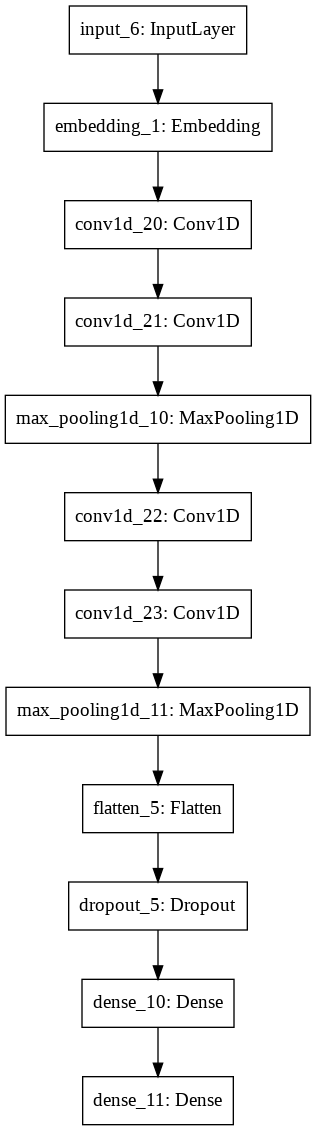

In [112]:
import keras
keras.utils.plot_model(model2, to_file='model2.png')